Text(0.5, 1.0, '°')

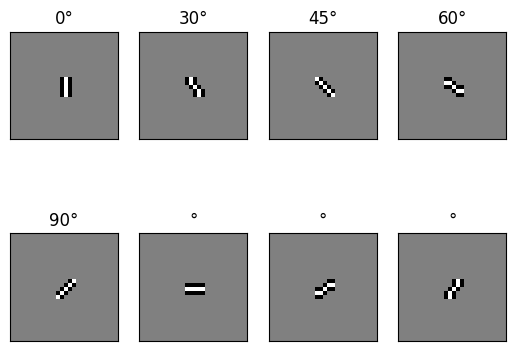

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n=28

[x_pre, y_pre] = np.meshgrid(range(n),range(n))

x_post = 14
y_post = 14

domainV = np.logical_and(abs(x_post-x_pre)<2, abs(y_post-y_pre)<3)
condV = np.logical_and(domainV, x_post==x_pre)
condVn = np.logical_and(domainV, x_post!=x_pre)

domainH = np.logical_and(abs(x_post-x_pre)<3, abs(y_post-y_pre)<2)
condH = np.logical_and(domainH, y_post==y_pre)
condHn = np.logical_and(domainH, y_post!=y_pre)

domain = np.logical_and(abs(x_post-x_pre)<3, abs(y_post-y_pre)<3)

domainCW = np.logical_and(domain, abs(y_post-y_pre+x_post-x_pre)<=1)
condCW = np.logical_and(domainCW, y_post-y_pre+x_post-x_pre==0)
condCWn = np.logical_and(domainCW, y_post-y_pre+x_post-x_pre!=0)

domainACW = np.logical_and(domain, abs(y_post-y_pre-x_post+x_pre)<=1)
condACW = np.logical_and(domainACW, y_post-y_pre-x_post+x_pre==0)
condACWn = np.logical_and(domainACW, y_post-y_pre-x_post+x_pre!=0)

plt.subplot(241)
plt.imshow(condV.astype(int) - condVn.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('0°')

plt.subplot(246)
plt.imshow(condH.astype(int) - condHn.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('°')

plt.subplot(245)
plt.imshow(condCW.astype(int) - condCWn.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('90°')

plt.subplot(243)
plt.imshow(condACW.astype(int) - condACWn.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('45°')

cond30 = np.logical_and(domain, abs(1.5*(x_post-x_pre)-y_post+y_pre)<1)
cond30n1 = np.logical_and(domain, abs(1.5*(x_post-x_pre-1)-y_post+y_pre)<1)
cond30n2 = np.logical_and(domain, abs(1.5*(x_post-x_pre+1)-y_post+y_pre)<1)

plt.subplot(242)
plt.imshow(cond30.astype(int) - cond30n1.astype(int) - cond30n2.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('30°')

cond60 = np.logical_and(domain, abs(x_post-x_pre-1.5*(y_post-y_pre))<1)
cond60n1 = np.logical_and(domain, abs(x_post-x_pre-1.5*(y_post-y_pre-1))<1)
cond60n2 = np.logical_and(domain, abs(x_post-x_pre-1.5*(y_post-y_pre+1))<1)

plt.subplot(244)
plt.imshow(cond60.astype(int) - cond60n1.astype(int) - cond60n2.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('60°')

cond120 = np.logical_and(domain, abs(x_post-x_pre+1.5*(y_post-y_pre))<1)
cond120n1 = np.logical_and(domain, abs(x_post-x_pre+1.5*(y_post-y_pre-1))<1)
cond120n2 = np.logical_and(domain, abs(x_post-x_pre+1.5*(y_post-y_pre+1))<1)

plt.subplot(247)
plt.imshow(cond120.astype(int) - cond120n1.astype(int) - cond120n2.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('°')

cond150 = np.logical_and(domain, abs(-1.5*(x_post-x_pre)-y_post+y_pre)<1)
cond150n1 = np.logical_and(domain, abs(-1.5*(x_post-x_pre-1)-y_post+y_pre)<1)
cond150n2 = np.logical_and(domain, abs(-1.5*(x_post-x_pre+1)-y_post+y_pre)<1)

plt.subplot(248)
plt.imshow(cond150.astype(int) - cond150n1.astype(int) - cond150n2.astype(int), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('°')

In [ ]:
################################################ V1 simple A ##############################################################

nL3a = nL2a*8

L3a = NeuronGroup(nL3a,
                 eqsV1,
                 threshold='v>0.3*volt',
                 reset='v=0*volt',
                 refractory=5*ms,
                 method='euler')

L3a.ori = np.repeat(range(8), nL2a)

X3 = np.tile(X.flatten(), (1,8))
X3.flatten()
L3a.x = X3.flatten()

Y3 = np.tile(Y.flatten(), (1,8))
Y3.flatten()
L3a.y = Y3.flatten()

ce = 'abs(y_pre-y_post)<3 and abs(x_pre-x_post)<3 and ('
ce += 'ori_post==0 and x_post==x_pre or '
ce += 'ori_post==1 and abs(1.5*(x_post-x_pre)-(y_post-y_pre))<1 or '
ce += 'ori_post==2 and abs(y_post-y_pre-x_post+x_pre)==0 or '
ce += 'ori_post==3 and abs((x_post-x_pre)-1.5*(y_post-y_pre))<1 or '
ce += 'ori_post==4 and y_post==y_pre or '
ce += 'ori_post==5 and abs((x_post-x_pre)+1.5*(y_post-y_pre))<1 or '
ce += 'ori_post==6 and abs(y_post-y_pre+x_post-x_pre)==0 or '
ce += 'ori_post==7 and abs(1.5*(x_post-x_pre)+(y_post-y_pre))<1)'

ci = 'abs(y_pre-y_post)<3 and abs(x_pre-x_post)<3 and ('
ci += 'ori_post==0 and abs(x_post-x_pre)==1 or '
ci += 'ori_post==1 and (abs(1.5*(x_post-x_pre-1)-(y_post-y_pre))<1 or abs(1.5*(x_post-x_pre+1)-(y_post-y_pre))<1) or '
ci += 'ori_post==2 and or '
ci += 'ori_post==3 and (abs((x_post-x_pre)-1.5*(y_post-y_pre-1))<1 or abs((x_post-x_pre)-1.5*(y_post-y_pre+1))<1) or '
ci += 'ori_post==4 and abs(y_post-y_pre)==1 or '
ci += 'ori_post==5 and (abs((x_post-x_pre)+1.5*(y_post-y_pre-1))<1 or abs((x_post-x_pre)+1.5*(y_post-y_pre+1))<1) or '
ci += 'ori_post==6 and or '
ci += 'ori_post==7 and (abs(1.5*(x_post-x_pre-1)+(y_post-y_pre))<1 or abs(1.5*(x_post-x_pre+1)+(y_post-y_pre))<1))'

e2a = Synapses(L2a, L3a, on_pre='ge += 1/5*dge')
e2a.connect(condition = ce)

i2a = Synapses(L2a, L3a, on_pre='gi -= 1/9*dge')
i2a.connect(condition = ci)